# Lok Sabha Election Result Analysis

### Md Ehtesham Ansari
### SRM University

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('cleaned_data.csv')

In [83]:
df

,state,constituency,image,result,votes,margin,name,party
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,won,102436,+ 24396,BISHNU PADA RAY,Bharatiya Janata Party
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,342,-102094,ANAND RAMNATH ARLEKAR,Independent
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,351,-102085,SALAMAT MONDAL,Socialist Unity Centre Of India (COMMUNIST)
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,380,-102056,USHA KUMARI,Independent
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,https://results.eci.gov.in/uploads4/candprofil...,lost,507,-101929,K VENKAT RAM BABU,Independent
...,...,...,...,...,...,...,...,...
8897,West Bengal,Coochbehar,https://results.eci.gov.in/uploads4/candprofil...,lost,749125,-39250,NISITH PRAMANIK,Bharatiya Janata Party
8898,West Bengal,Coochbehar,https://results.eci.gov.in/uploads4/candprofil...,lost,30267,-758108,NITISH CHANDRA ROY,All India Forward Bloc
8899,West Bengal,Coochbehar,https://results.eci.gov.in/uploads4/candprofil...,lost,10679,-777696,PIYA ROY CHOWDHURY,Indian National Congress
8900,West Bengal,Bolpur,https://results.eci.gov.in/uploads4/candprofil...,lost,2792,-852841,BIJOY DOLUI,Socialist Unity Centre Of India (COMMUNIST)


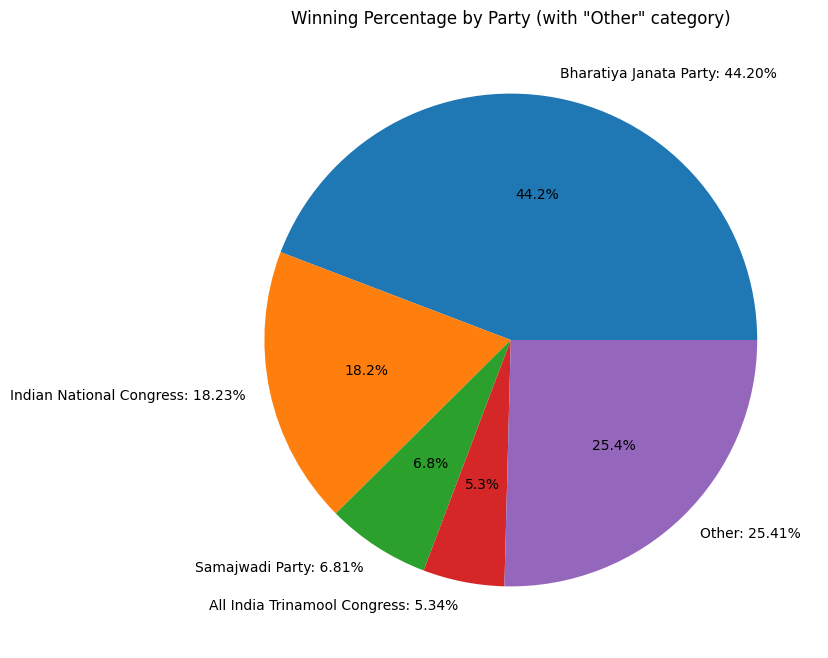

In [84]:
# Plotting the winning percentage by party

won_df = df[df['result'] == 'won']

wins_by_party = won_df['party'].value_counts()

total_wins = wins_by_party.sum()

winning_percentage = (wins_by_party / total_wins) * 100
threshold_percentage = 5  # Example threshold

high_percentage_parties = winning_percentage[winning_percentage >= threshold_percentage]

other_percentage = winning_percentage[winning_percentage < threshold_percentage].sum()
other_series = pd.Series([other_percentage], index=['Other'])

plot_data = pd.concat([high_percentage_parties, other_series])

plt.figure(figsize=(10, 8))
plt.pie(plot_data, labels=[f'{party}: {value:.2f}%' for party, value in plot_data.items()], autopct='%1.1f%%')
plt.title('Winning Percentage by Party (with "Other" category)')
plt.show()

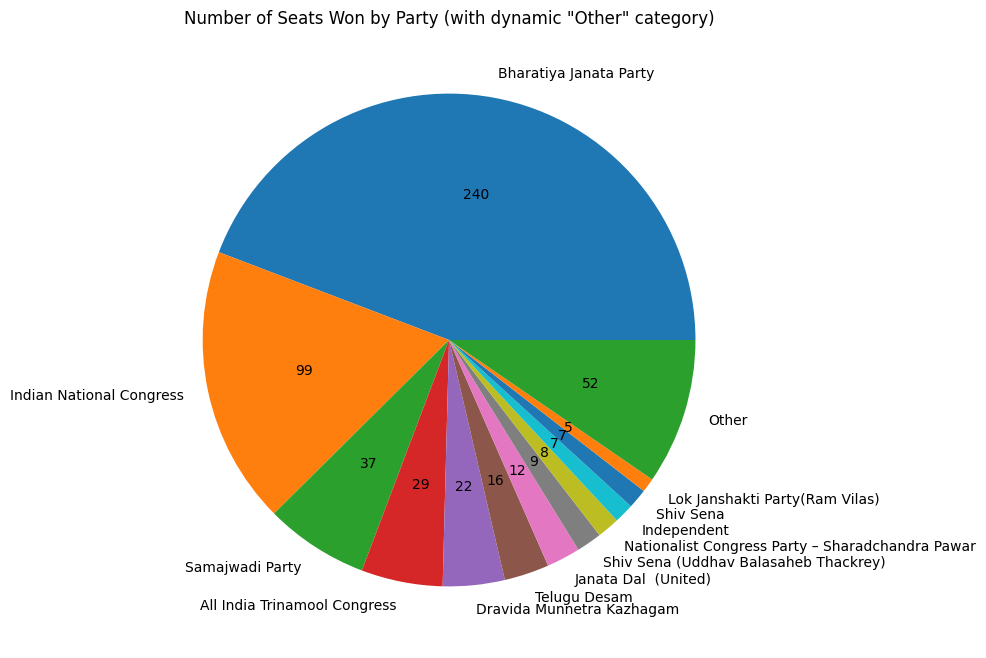

In [85]:
# Plotting the number of seats won by party
seats_won_by_party = df[df['result'] == 'won']['party'].value_counts()

threshold = 5
parties_below_threshold = seats_won_by_party[seats_won_by_party < threshold]

other_category_count = parties_below_threshold.sum()

seats_won_by_party = seats_won_by_party.drop(parties_below_threshold.index)

if other_category_count > 0: 
    seats_won_by_party['Other'] = other_category_count

plt.figure(figsize=(10, 8))
plt.pie(seats_won_by_party, labels=seats_won_by_party.index, autopct=lambda p: '{:.0f}'.format(p * sum(seats_won_by_party) / 100))
plt.title('Number of Seats Won by Party (with dynamic "Other" category)')
plt.show()

     candidate_type  lost  won  vote_share  winning_margin
0  Party-Affiliated  7817  543    0.060667   161514.996317


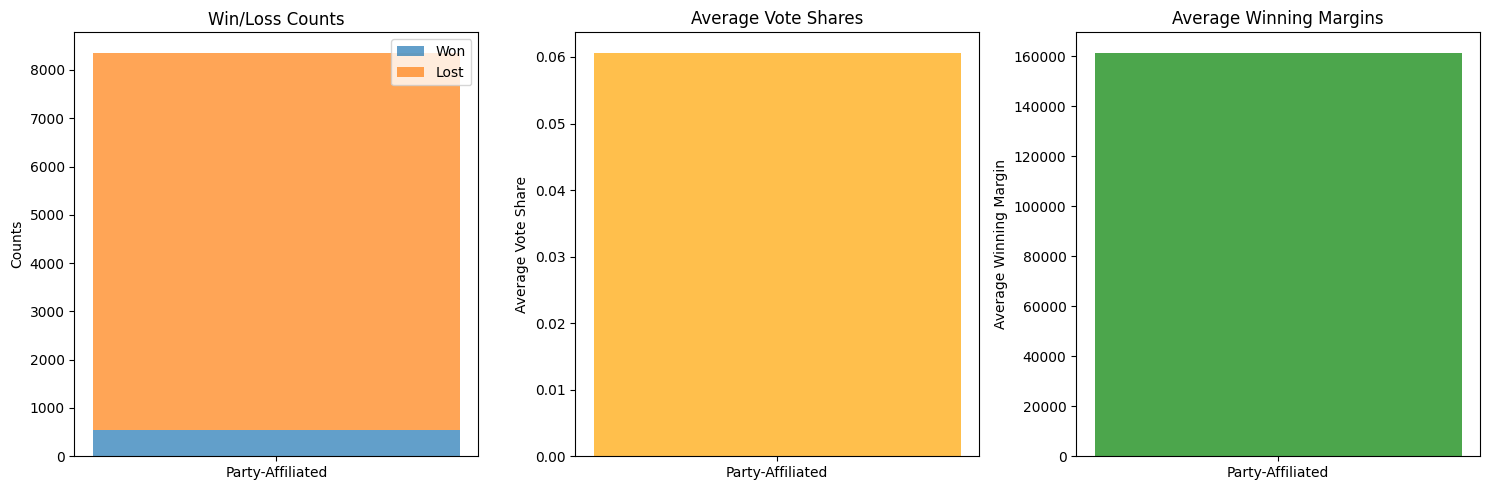

In [33]:
# Analyse the performance of independent candidates vs party-affiliated candidates
df['candidate_type'] = df['party'].apply(lambda x: 'Independent' if x == 'IND' else 'Party-Affiliated')

win_loss_counts = df.groupby(['candidate_type', 'result']).size().unstack(fill_value=0).reset_index()

df['total_votes'] = df.groupby('constituency')['votes'].transform('sum')
df['vote_share'] = df['votes'] / df['total_votes']
average_vote_share = df.groupby('candidate_type')['vote_share'].mean().reset_index()

df_sorted = df.sort_values(by=['constituency', 'votes'], ascending=[True, False])
df_sorted['next_votes'] = df_sorted.groupby('constituency')['votes'].shift(-1)
df_sorted['winning_margin'] = df_sorted['votes'] - df_sorted['next_votes'].fillna(0)
average_winning_margin = df_sorted[df_sorted['result'] == 'won'].groupby('candidate_type')['winning_margin'].mean().reset_index()

performance_summary = pd.merge(win_loss_counts, average_vote_share, on='candidate_type')
performance_summary = pd.merge(performance_summary, average_winning_margin, on='candidate_type')

print(performance_summary)

plt.figure(figsize=(15, 5))

# Plotting Win/Loss Counts
plt.subplot(1, 3, 1)
plt.bar(performance_summary['candidate_type'], performance_summary['won'], label='Won', alpha=0.7)
plt.bar(performance_summary['candidate_type'], performance_summary['lost'], bottom=performance_summary['won'], label='Lost', alpha=0.7)
plt.ylabel('Counts')
plt.title('Win/Loss Counts')
plt.legend()

# Plotting Average Vote Shares
plt.subplot(1, 3, 2)
plt.bar(performance_summary['candidate_type'], performance_summary['vote_share'], color='orange', alpha=0.7)
plt.ylabel('Average Vote Share')
plt.title('Average Vote Shares')

# Plotting Average Winning Margins
plt.subplot(1, 3, 3)
plt.bar(performance_summary['candidate_type'], performance_summary['winning_margin'], color='green', alpha=0.7)
plt.ylabel('Average Winning Margin')
plt.title('Average Winning Margins')

plt.tight_layout()
plt.show()


In [86]:
# Analyse the voter turnout in each constituency
import csv
from prettytable import PrettyTable

voter_turnout = {}

with open('CLEANED_DATA.CSV', mode='r') as file:
    csv_reader = csv.DictReader(file)
    
    for row in csv_reader:
        constituency = row['constituency']
        votes_str = row['votes']
        
        try:
            votes = int(votes_str)
        except ValueError:
            continue
        
        voter_turnout[constituency] = voter_turnout.get(constituency, 0) + votes

table = PrettyTable()
table.field_names = ["Constituency", "Total Votes"]

for constituency, total_votes in sorted(voter_turnout.items()):
    table.add_row([constituency, f"{total_votes:,}"])

print(table)


+---------------------------+-------------+
|        Constituency       | Total Votes |
+---------------------------+-------------+
|           AJMER           |  1,201,179  |
|           ALWAR           |  1,253,438  |
|           AMBALA          |  1,346,722  |
|      ANANTNAG-RAJOURI     |  1,026,148  |
|         ARAKKONAM         |  1,163,822  |
|           ARANI           |  1,140,261  |
|          Adilabad         |  1,235,597  |
|            Agra           |  1,123,779  |
|       Ahmedabad East      |  1,128,339  |
|       Ahmedabad West      |   966,646   |
|         Ahmednagar        |  1,325,477  |
|          Akbarpur         |  1,086,953  |
|           Akola           |  1,173,072  |
|         Alappuzha         |  1,058,703  |
|          Alathur          |   992,268   |
|          Aligarh          |  1,133,366  |
|        Alipurduars        |  1,421,389  |
|         Allahabad         |   947,000   |
|           Almora          |   668,497   |
|      Amalapuram (SC)      |  1

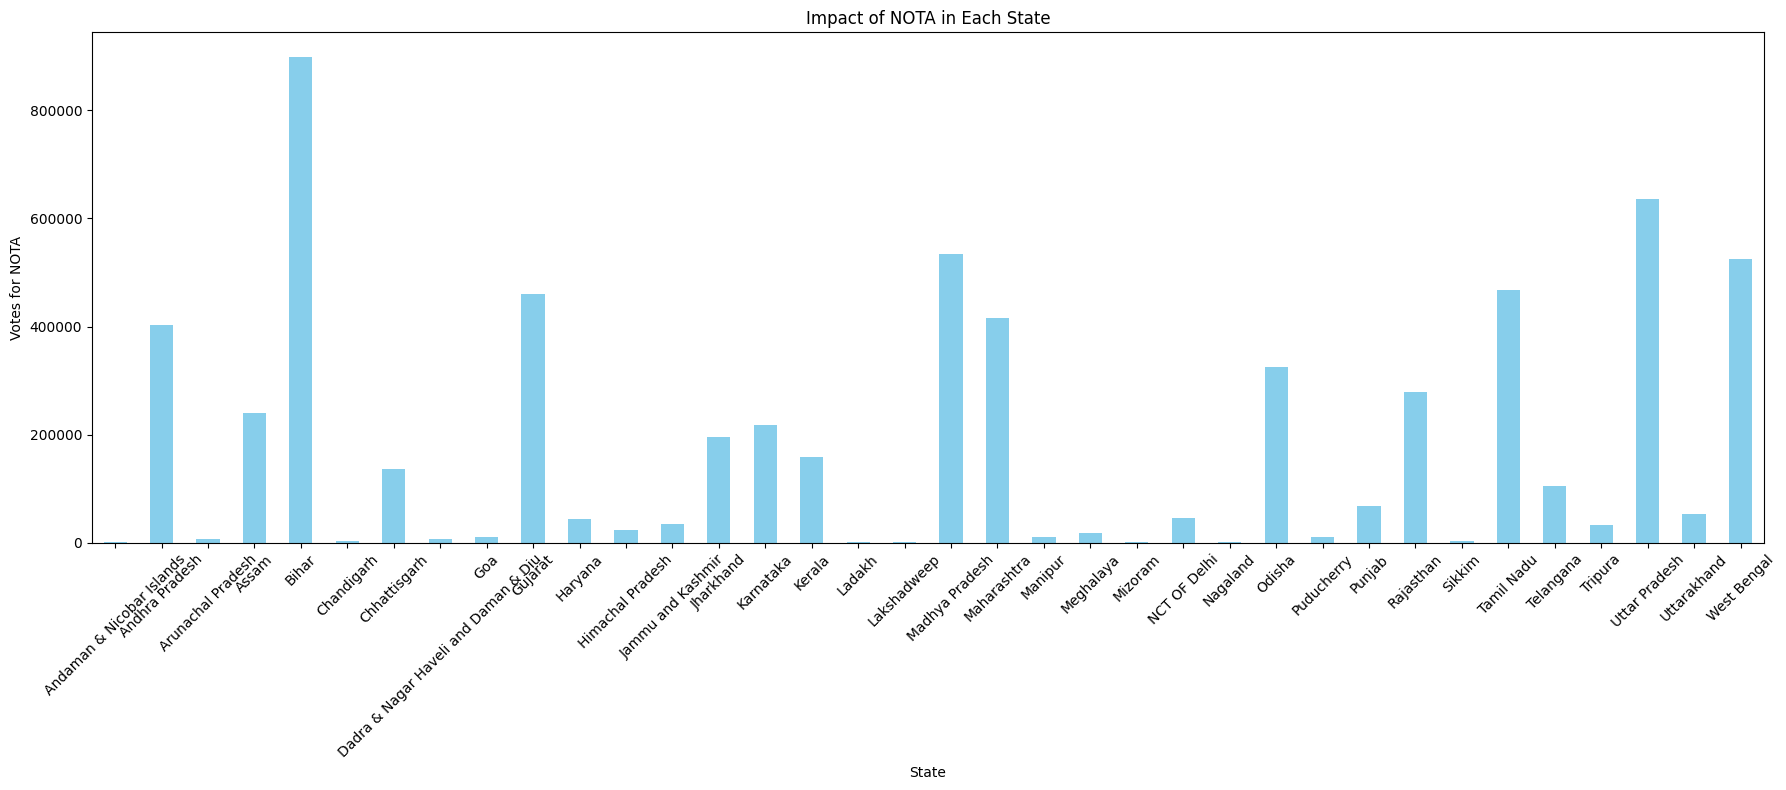

In [57]:
# Impact of NOTA in each state
nota_df = df[df['party'] == 'None of the Above']

nota_votes_by_state = nota_df.groupby('state')['votes'].sum()

nota_votes_by_state.plot(kind='bar', figsize=(18, 8), color='skyblue')
plt.title('Impact of NOTA in Each State')
plt.xlabel('State')
plt.ylabel('Votes for NOTA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
# Analyse highest and lowest votes received by a party
import csv

highest_votes = 0
lowest_votes = float('inf') 
highest_votes_state = ""
lowest_votes_state = ""

with open('CLEANED_DATA.CSV', mode='r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        votes = int(row['votes']) if row['votes'] else 0
        state = row['state']
        if votes > highest_votes:
            highest_votes = votes
            highest_votes_state = state
        if 0 < votes < lowest_votes:
            lowest_votes = votes
            lowest_votes_state = state

print(f"Highest votes received by a party: {highest_votes_state} with {highest_votes} votes")
print(f"Lowest votes received by a party: {lowest_votes_state} with {lowest_votes} votes")

Highest votes received by a party: Assam with 1471885 votes
Lowest votes received by a party: Lakshadweep with 61 votes


                       name                     party    votes
596         RAKIBUL HUSSAIN  Indian National Congress  1471885
3459        SHANKAR LALWANI    Bharatiya Janata Party  1226751
3276  SHIVRAJ SINGH CHOUHAN    Bharatiya Janata Party  1116460
2685       DR C N MANJUNATH    Bharatiya Janata Party  1079002
1239      BRIJMOHAN AGRAWAL    Bharatiya Janata Party  1050351


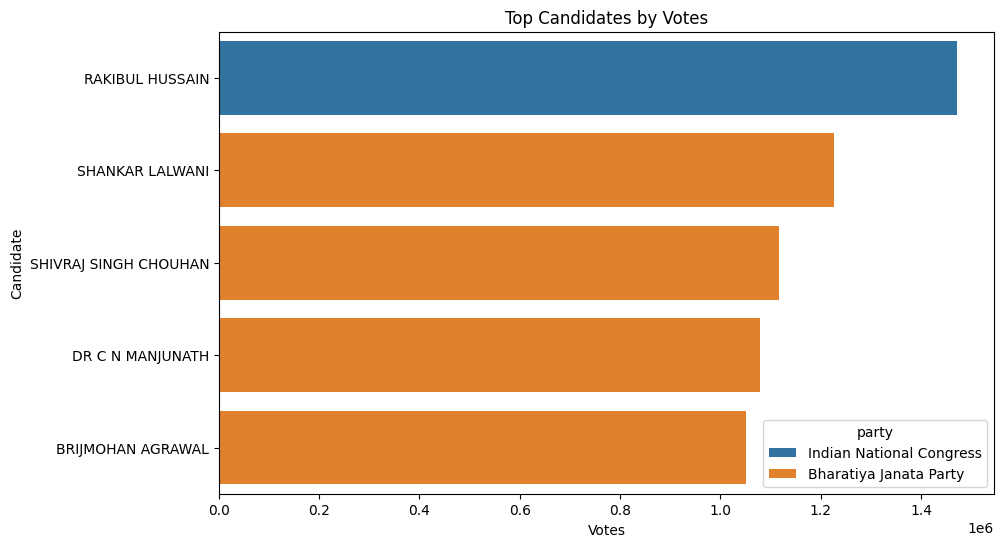

In [60]:
# Analyse the top candidates by votes
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

df_sorted = df.sort_values(by='votes', ascending=False)

top_candidates = df_sorted.head(5)

print(top_candidates[['name', 'party', 'votes']])
plt.figure(figsize=(10, 6))
sns.barplot(x='votes', y='name', data=top_candidates, hue='party', dodge=False)
plt.title('Top Candidates by Votes')
plt.xlabel('Votes')
plt.ylabel('Candidate')
plt.show()


Top State in Voter Turnout: Uttar Pradesh with 87911642 votes
Bottom State in Voter Turnout: Lakshadweep with 49200 votes


/var/folders/lb/0kvsq4m52xz_pn_8rxgbr5lm0000gn/T/ipykernel_41164/3696842515.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='votes', y='state', data=df, estimator=sum, ci=None, palette='viridis')


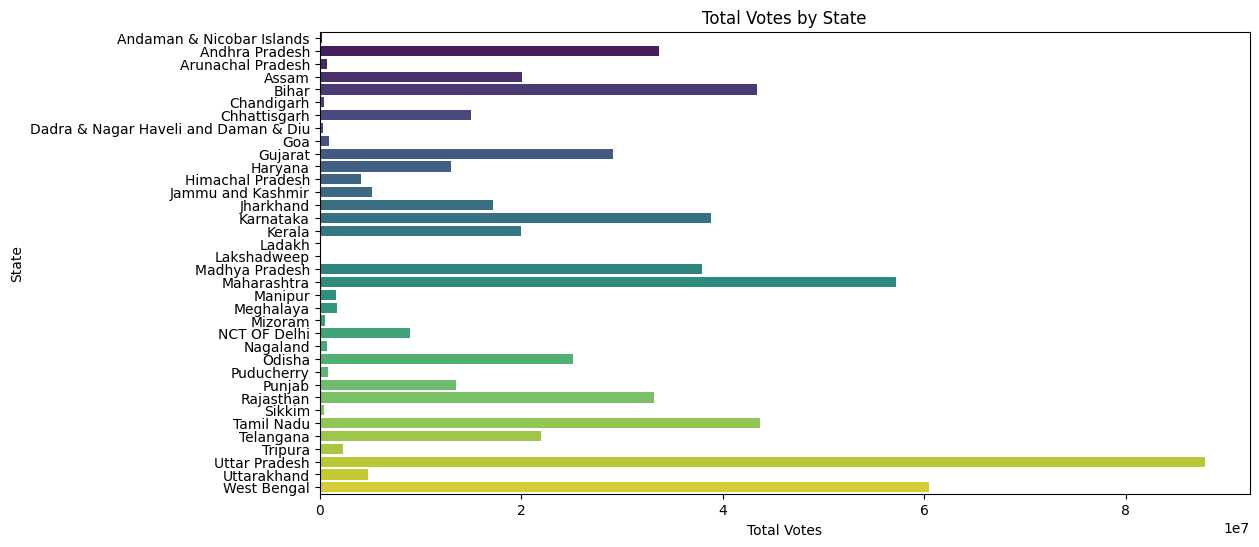

In [61]:
# top state in terms of voter turnout
top_state = df.groupby('state')['votes'].sum().idxmax()
top_state_votes = df.groupby('state')['votes'].sum().max()

# bottom state in terms of voter turnout
bottom_state = df.groupby('state')['votes'].sum().idxmin()
bottom_state_votes = df.groupby('state')['votes'].sum().min()

print(f'Top State in Voter Turnout: {top_state} with {top_state_votes} votes')
print(f'Bottom State in Voter Turnout: {bottom_state} with {bottom_state_votes} votes')

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='votes', y='state', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Votes by State')
plt.xlabel('Total Votes')
plt.ylabel('State')
plt.show()

BJP Wins: 240, Congress Wins: 99
BJP Vote Share: 235973935, Congress Vote Share: 136759064
BJP Average Margin: 104114.56009070294, Congress Average Margin: 39652.20121951219


/var/folders/lb/0kvsq4m52xz_pn_8rxgbr5lm0000gn/T/ipykernel_41164/2795206968.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bjp_congress_data['abs_margin'] = bjp_congress_data['margin'].apply(lambda x: abs(int(x.replace('+', '').strip())) if x.replace('+', '').strip().isdigit() else 0)
/var/folders/lb/0kvsq4m52xz_pn_8rxgbr5lm0000gn/T/ipykernel_41164/2795206968.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='party', y='votes', data=bjp_congress_data, estimator=sum, ci=None, palette='coolwarm')


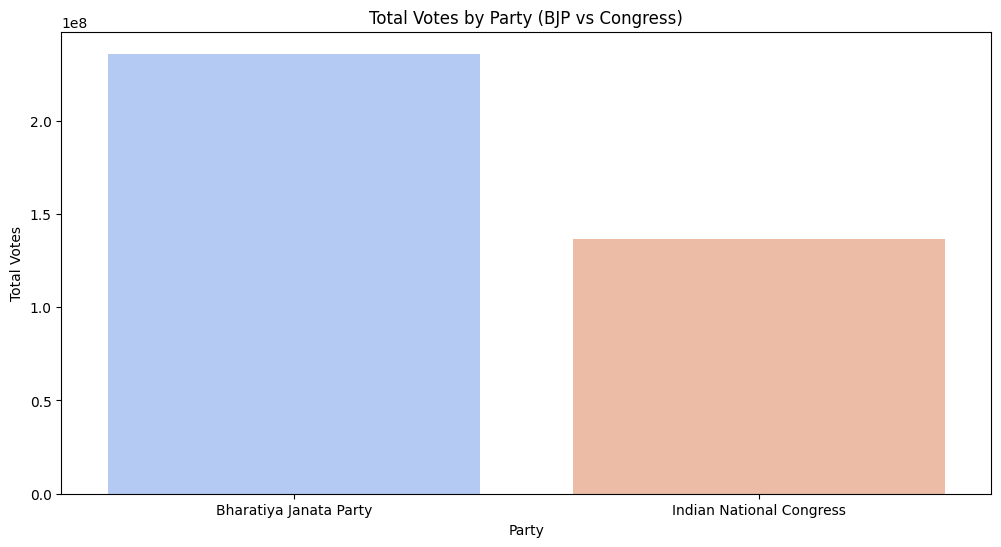

In [80]:

# Filter data for BJP and Congress
bjp_congress_data = df[df['party'].isin(['Bharatiya Janata Party', 'Indian National Congress'])]

bjp_wins = (bjp_congress_data['party'] == 'Bharatiya Janata Party') & (bjp_congress_data['result'] == 'won')
congress_wins = (bjp_congress_data['party'] == 'Indian National Congress') & (bjp_congress_data['result'] == 'won')

bjp_votes = bjp_congress_data[bjp_congress_data['party'] == 'Bharatiya Janata Party']['votes'].sum()
congress_votes = bjp_congress_data[bjp_congress_data['party'] == 'Indian National Congress']['votes'].sum()

bjp_congress_data['abs_margin'] = bjp_congress_data['margin'].apply(lambda x: abs(int(x.replace('+', '').strip())) if x.replace('+', '').strip().isdigit() else 0)
bjp_avg_margin = bjp_congress_data[bjp_congress_data['party'] == 'Bharatiya Janata Party']['abs_margin'].mean()
congress_avg_margin = bjp_congress_data[bjp_congress_data['party'] == 'Indian National Congress']['abs_margin'].mean()

print(f"BJP Wins: {bjp_wins.sum()}, Congress Wins: {congress_wins.sum()}")
print(f"BJP Vote Share: {bjp_votes}, Congress Vote Share: {congress_votes}")
print(f"BJP Average Margin: {bjp_avg_margin}, Congress Average Margin: {congress_avg_margin}")
plt.figure(figsize=(12, 6))
sns.barplot(x='party', y='votes', data=bjp_congress_data, estimator=sum, ci=None, palette='coolwarm')
plt.title('Total Votes by Party (BJP vs Congress)')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.show()
